# TikTok Data Analysis: The Hype House#

**Ahmad Bhatti: mab558
  Celina Kim: ak786
  Rachel Kwon: jk2353
  Sneha Sharma: ss3257**


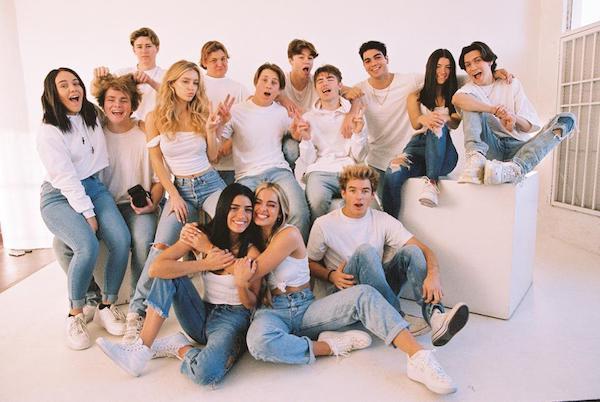

## Introduction

TikTok is a short-video-sharing social media application where users post 1-60 second clips showcasing them doing virtually anything from singing and dancing to cooking and comedy. The app is unique in that it is dominated by "regular people" such as Connecticut teen Charli D'amelio, who in a span of 4 months has amassed a whopping 53 million followers. For our project, we wanted to focus on a group of US-based TikTok stars that purchased a house together in California where they live, create content, hold livestreams, and collaborate daily. They are known as **The Hype House**. The Hype House's TikTok account alone has 15M followers and the members of The Hype House have a collective total of **219.7M** followers on their individual accounts. 

The objective of this data analysis is to analyze the rapidly growing popularity of TikTok’s Hype House members in the context of their TikTok history and their collaborations with other creators, as well as evaluate how unexpected and fascinating factors like the Coronavirus pandemic and video length might be correlated with their success. Specifically, we sought to address the following questions:

- Has the COVID-19 lockdown catalyzed Hype House success?
- Did joining Hype House increase a user’s popularity? 
- Which Hype House member collaborations garner the most success?
- Are videos of a certain length more successful than others?

In summary, our findings indicated that:
- there is a statistically significant correlation between the rise of coronavirus cases in the U.S. and the TikTok success of key Hype House members Charli, Avani, and Chase
- every member of Hype House saw a growth in popularity after joining, but some saw larger growth than others
- TikTok collaborations between romantic partners were significantly more successful than those between siblings or friends
- 15-second videos are most successful in terms of likes and plays, while 59-second videos are most successful in terms of shares

## Data Description

###  Background

**Why was this dataset created?** 

We scraped, compiled, and filtered this data to study the rapidly growing popularity of TikTok’s Hype House  members, a collective of TikTok creators that includes 16 rising or established Gen Z influencers on the social media platform. 

**Who funded the creation of this dataset?**

N/A

### Composition

**What are the observations(rows) and attributes(columns) of the dataset?**


Rows: Creator's posts 

Columns: 

- text: caption on the original post
- createTime: time counter (in seconds)
- authorMeta.name: username of the account
- authorMeta.heart: total number of likes the account has
- authorMeta.video: total number of videos posted
- musicMeta.musicName: name of sound used in the video
- musicMeta.musicAuthor: original owner of the sound used in the video
- videoMeta.duration: duration of the post
- diggCount: number of likes on the post
- shareCount: number of shares on the post
- playCount: number of times the post has been watched
- commentCount: number of comments on the post
- Mentions: reference to other accounts
- Hashtags: hashtags used in the post
- dates: date of post as a datetime object
- EngagementRates: calculated engagement rate
- HypeHouse?: status of Hype House membership (0 = not yet in Hype House, 1 = in Hype House)


### Collection Process 

**What processes might have influenced what data was observed and recorded and what was not?**

The data recorded may have been influenced if creators deleted less popular posts. This would skew their average likes, shares, comments, and plays towards more popular videos. The data acquired would not be 100% representative of their content posted.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

This dataset was entirely scraped; we used “tiktok-scraper”, linked below, to gather data on all current Hype House members. The scraper would output a large CSV file including all information available on the user's profile since the creation of their account. After scraping the data for all Hype House members, we filtered the CSVs by dropping unnecessary and redundant columns. The only time data available in the CSVs was a seconds-counter - thus, we wrote a function that converted the time data (a column of strings) to datetime objects and appended this column titled 'dates'. 

We also included two supplementary datasets for the analysis conducted on the COVID-19 pandemic: (1) Cumulative Coronavirus cases in U.S. per day dataset, (2) Follower history for specified Hype House members dataset. The preprocessing for both supplemental datasets involved converting the time information to datetime objects, as is illustrated below.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

N/A

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

tik-tok scraper: https://github.com/drawrowfly/tiktok-scraper 
Raw source data: https://github.com/celinakim/FinalProject-Tiktok/tree/master/rawdata

### TikTok Scraping Example
This example serves to illustrate how we scraped data using the https://github.com/drawrowfly/tiktok-scraper scraper.  
**Note:** The scraper was run in terminal and does not execute in Jupyter Notebook; the example below is for illustrative purposes only. 


In [2]:
#yarn global add tiktok-scraper ##install the scraper

#tiktok-scraper user charlidamelio -n 300 -t csv ##scrape 300 of charlidamelio's recent posts and output as a csv

SyntaxError: invalid syntax (<ipython-input-2-b09fccd8cfcc>, line 1)

### Loading and Organizing Pre-processed Dataset

In [1]:
##Necessary modules 
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
##Reading in our CSV files as dataframes, a comprehensive dataset will be formed as a dictionary below
hypehouse_df = pd.read_csv("cleandata/thehypehouse.csv")
charlidamelio_df = pd.read_csv("cleandata/charlidamelio.csv")
avani_df = pd.read_csv("cleandata/avani.csv")
tonylopez_df = pd.read_csv("cleandata/tonylopez.csv")
k0uvr_df = pd.read_csv("cleandata/k0uvr.csv")
jackwright_df = pd.read_csv("cleandata/jackwright.csv")
jameswright_df = pd.read_csv("cleandata/jameswright.csv")
ondreazlopez_df = pd.read_csv("cleandata/ondreazlopez.csv")
addisonre_df = pd.read_csv("cleandata/addisonre.csv")
alexwarren_df = pd.read_csv("cleandata/alexwarren.csv")
rylandstorms_df = pd.read_csv("cleandata/rylandstorms.csv")
petroutv_df = pd.read_csv("cleandata/petroutv.csv")
larrayeeee_df = pd.read_csv("cleandata/larrayeeee.csv")
lilhuddy_df = pd.read_csv("cleandata/lilhuddy.csv")
dixiedamelio_df = pd.read_csv("cleandata/dixiedamelio.csv")
nickaustin_df = pd.read_csv("cleandata/nickaustin.csv")

In [3]:
##Preparing arrays to create dictionary 
hypehouse_members_data = [hypehouse_df, charlidamelio_df, avani_df, tonylopez_df, k0uvr_df, jackwright_df, jameswright_df, ondreazlopez_df, addisonre_df, alexwarren_df, rylandstorms_df, petroutv_df, larrayeeee_df, lilhuddy_df, dixiedamelio_df, nickaustin_df]
hypehouse_members_names = ["thehypehouse", "charlidamelio", "avani", "tonylopez", "k0uvr", "jackwright", "jameswright", "ondreazlopez", "addisonre", "alexwarren", "rylandstorms","petroutv", "larrayeeee", "lilhuddy", "dixiedamelio", "nickaustin"]

In [4]:
##ref_date is date of the first post in the dataframe 
##user is a dataframe of the Tiktok user's information
##Dates column will be added for each dataframe, keeping createTimes columns for now in case needed in future, but as you can observe the format is very confusing
dates = [[5,4,2020], [5,5,2020], [5,5,2020], [5,5,2020], [5,4,2020], [5,5,2020], [5,4,2020], [5,4,2020], [5,5,2020], [5,3,2020], [5,4,2020], [5,5,2020], [5,3,2020], [5,4,2020], [5,3,2020], [5,4,2020]]

def createTime_to_date (user, ref_date):
    ref_date = datetime.date(ref_date[2], ref_date[0], ref_date[1])
    ref_time = user["createTime"][0]
    times = np.asarray(user['createTime'])
    days = np.round(np.abs(times - ref_time)/86400, 0)
    
    dates = []
    for x in days:
        conv_days = datetime.timedelta(x)
        date = ref_date - conv_days
        dates.append(date)
        
    dates - np.asarray(dates)
    
    return dates

for x in range(len(hypehouse_members_data)):
    post_dates = createTime_to_date(hypehouse_members_data[x], dates[x])
    hypehouse_members_data[x]["dates"] = post_dates 

In [5]:
##Combining data into one accessible dictionary
dataset = {}
for member in range(len(hypehouse_members_data)):
    dataset.update({hypehouse_members_names[member]: hypehouse_members_data[member]})

In [6]:
##testcase
dataset["thehypehouse"]

,text,createTime,authorMeta.name,authorMeta.heart,authorMeta.video,musicMeta.musicName,musicMeta.musicAuthor,videoMeta.duration,diggCount,shareCount,playCount,commentCount,mentions,hashtags,dates,Engagement Rates,Hypehouse?
0,@lilhuddy @tonylopez @larrayeeee @rylandstormss,1588638044,thehypehouse,376697318,219,original sound,fire.soundz0,8,862200,2315,2989112,7567,"[""@lilhuddy"",""@tonylopez"",""@larrayeeee"",""@ryla...",[],2020-05-04,29.175287,1
1,❤️,1588633083,thehypehouse,376697318,219,Mariposa,Peach Tree Rascals,15,577404,1403,1954069,8861,[],[],2020-05-04,30.074066,1
2,HAPPY BIRTHDAY CHARLI❤️ @jameswrightt @jack.wr...,1588379179,thehypehouse,376697318,219,Hit Yo Groove,RunitupTahj,15,969013,1009,3277407,7865,"[""@jameswrightt"",""@jack""]",[],2020-05-01,29.837216,1
3,Us first day out of quarantine #tuff #jaahslt ...,1588268129,thehypehouse,376697318,219,Tuff,Jaah SLT,15,1193776,9242,4308417,19235,"[""@jaahslt2""]","[{""id"":""62804"",""name"":""tuff"",""title"":"""",""cover...",2020-04-30,28.368958,1
4,this dance is gas 🔥 @lilhuddy @tonylopez dc :...,1588039799,thehypehouse,376697318,219,Crayons᯾,wavyxdrae,9,827758,2503,3648174,7285,"[""@lilhuddy"",""@tonylopez"",""@childish__calvino""]",[],2020-04-27,22.957951,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,@alexwaarren @k0uvr,1576811938,thehypehouse,376697382,219,original sound,thehypehouse,15,632065,3221,5855635,1235,"[""@alexwaarren"",""@k0uvr""]",[],2019-12-19,10.870230,1
214,@rylandstormss @lilhuddy,1576811899,thehypehouse,376697382,219,Follow Insta shelliehematian,.shellie,15,885211,3986,7583765,2375,"[""@rylandstormss"",""@lilhuddy""]",[],2019-12-19,11.756324,1
215,@calvingoldby @rylandstormss @huston16 @daisyk...,1576806783,thehypehouse,376697382,219,Say So,Doja Cat,8,576634,2533,6054995,2010,"[""@calvingoldby"",""@rylandstormss"",""@huston16"",...",[],2019-12-19,9.598307,1
216,@nickaustinn @lilhuddy,1576798833,thehypehouse,376697382,219,original sound,moistmoth,15,1702081,9435,12110067,4247,"[""@nickaustinn"",""@lilhuddy""]",[],2019-12-19,14.168072,1


### Functions For Later

In [7]:
#function to get highest number of likes, shares, plays, or comments per day
#user = string of user key in dataset dictionary  
#var = string of the top type as defined in data description(ex: top likes is 'diggCount')
def top_per_day(user, var):
    unique_dates = dataset[user].dates.unique()
    top_per_day = []
    for x in unique_dates:
        temp = dataset[user][dataset[user]['dates'] == x]
        top = temp[var].max()
        top_per_day.append(top)
    return np.asarray(top_per_day)

In [8]:
# Generate random permutation
# x = array to randomly permute
def permuted(x):
    return np.random.permutation(x.copy())

## Has the COVID-19 lockdown catalyzed Key Hype House Members' Social Media success?

The Coronavirus pandemic has encouraged people to stay home and maintain social distance. Isolated from their friends and family, many Americans have turned to social media. Hype House members have seen a massive spike in their viewership and followers in the past few months. For instance, Charli Damelio, who ended 2019 with 1.5 million followers, has over 50 million followers today (May 5, 2020). 

We hypothesize that the rise in coronavirus cases in the U.S. catalyzed the explosive growth of many Hype House's members' social media success. The objective of this analysis is to (1) visualize the relationship between coronavirus cases and TikTok influencer popularity, (2) quantify the correlation between the two variables, and (3) evaluate the statistical significance of this correlation. 

We analyzed the follower history (number of followers over time) of three key hype house members [Charli Damelio, Avani, Lil Huddy] who have had active TikTok profiles for at least 6 months before the pandemic took hold of the U.S.

***
*Study Summary*

**Independent Variable:** Coronavirus Cases per Day   
**Depedent Varable:** Number of Followers 

Data Analysis Methodology: 
- plotted the independent vs dependent variables
- fit a linear regression to the independent vs dependent variables
- compared the relationship between the variables to simple randomness using a T-test 
- calculated the Pearson correlation coefficient between the variables

In [9]:
#Loading and cleaning COVID-19 dataset
#data from: https://www.statista.com/statistics/1103185/cumulative-coronavirus-covid19-cases-number-us-by-day/
cum_covid = pd.read_csv('cleandata/covid-19.csv')
cum_covid = cum_covid.drop([0,1])
cum_covid = cum_covid.rename(columns = {'Cumulative cases of COVID-19 in the U.S. from January 22 to May 8, 2020, by day':'Date', 'Unnamed: 1':'Cumulative_Cases'})
cum_covid = cum_covid.reset_index(drop=True)

#convert the cumulative case column type from string --> int
cum_covid.replace(',','', regex=True, inplace=True)
cum_covid['Cumulative_Cases'] = cum_covid['Cumulative_Cases'].astype(int)

#convert the dates column type to datetime objects
conv_dates = []
d1 = datetime.date(2020, 1, 22)
conv_dates.append(d1)
for x in range(1, len(cum_covid['Date'])):
    d = d1+datetime.timedelta(x)
    conv_dates.append(d)
cum_covid['Date'] = conv_dates

display(cum_covid)

,Date,Cumulative_Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
103,2020-05-04,1125719
104,2020-05-05,1154985
105,2020-05-06,1171185
106,2020-05-07,1193452


In [10]:
#loading in cumulative follower data from cloutmeter
charli_clout = pd.read_csv('cleandata/charli_clout.csv')
avani_clout = pd.read_csv('cleandata/avani_clout.csv')
huddy_clout = pd.read_csv('cleandata/lilhuddy_clout.csv')

In [11]:
from datetime import datetime

In [12]:
#convert date column to datetime objects
dates = []
for x in range(len(charli_clout)):
    d = datetime.strptime(charli_clout['date'][x][0:10], '%Y-%m-%d').date()
    dates.append(d)
charli_clout['date'] = dates

dates = []
for x in range(len(avani_clout)):
    d = datetime.strptime(avani_clout['date'][x][0:10], '%Y-%m-%d').date()
    dates.append(d)
avani_clout['date'] = dates

dates = []
for x in range(len(huddy_clout)):
    d = datetime.strptime(huddy_clout['date'][x][0:10], '%Y-%m-%d').date()
    dates.append(d)
huddy_clout['date'] = dates

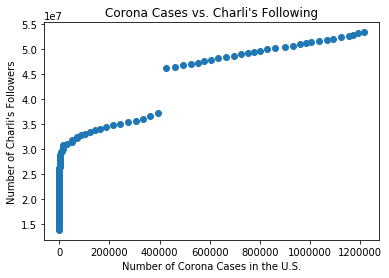

In [13]:
#Charli: Visualizing Corona Cases vs. Followers
charli = charli_clout['followers'][0:108].tolist() #using follower data from the day of first case of corona onwards
charli.reverse()
plt.scatter(cum_covid['Cumulative_Cases'], charli)
plt.title("Corona Cases vs. Charli's Following")
plt.xlabel('Number of Corona Cases in the U.S.')
plt.ylabel("Number of Charli's Followers")
plt.show()

In [14]:
#Charli: Quantifying Relationshp Between Corona Cases vs. Followers 

#Fitting data to a linear regression
charli_2D = np.reshape(charli, (-1,1)) #convert data from 1D to 2D array 
charli_model = LinearRegression().fit(cum_covid[['Cumulative_Cases']], charli_2D)
charli_corona_slope = charli_model.coef_ 
charli_corona_corr = np.corrcoef(cum_covid['Cumulative_Cases'],charli)[0][1]
print('Slope of Linear Fit: ', charli_corona_slope[0][0])
print("Pearson Correlation of Charli's Followers & Corona Cases: ", charli_corona_corr)

Slope of Linear Fit:  30.286034417606928
Pearson Correlation of Charli's Followers & Corona Cases:  0.9124419333529634


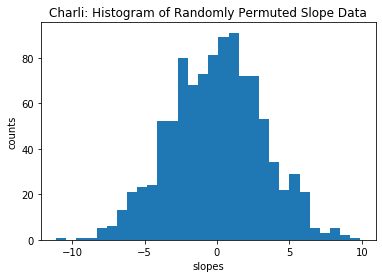

In [15]:
#T-test: Compare the patterns observed to simple randomness using random permutations
charli_random = np.zeros(1000)
for x in range(1000):
    reshaped = permuted(charli).reshape(-1,1)
    charli_random[x] = LinearRegression().fit(cum_covid[['Cumulative_Cases']], reshaped).coef_

plt.hist(charli_random, bins=30)
plt.xlabel('slopes')
plt.ylabel('counts')
plt.title('Charli: Histogram of Randomly Permuted Slope Data')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


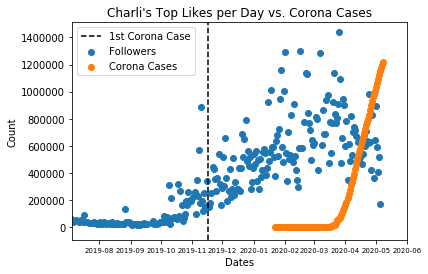

In [16]:
#Charli: Visualizing Charli's top likes per day since July 2019 vs number of corona cases in U.S. 

# **IMPORTANT NOTES** 
#Followers data has been normalized by 10 to visualize on same scale as Corona Cases
#The dashed line indicates the date of the first case of Coronavirus in China

plt.scatter(dataset['charlidamelio'].dates.unique(), top_per_day('charlidamelio', 'diggCount')/10, label='Followers')
plt.scatter(cum_covid['Date'], cum_covid['Cumulative_Cases'], label='Corona Cases')
plt.xlim(datetime(2019, 7,5), datetime(2020, 6, 1))
plt.axvline(x=datetime(2019, 11, 17, 0, 0), color='k', linestyle='--', label = '1st Corona Case')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.legend()
plt.title("Charli's Top Likes per Day vs. Corona Cases")
plt.xlabel('Dates')
plt.ylabel('Count')
plt.show()

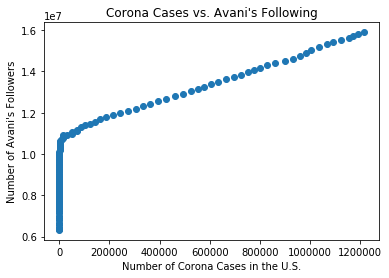

In [17]:
#Avani: Visualizing Corona Cases vs. Followers
avani = avani_clout['followers'][0:108].tolist() #using follower data from the day of first case of corona onwards
avani.reverse()
plt.scatter(cum_covid['Cumulative_Cases'], avani)
plt.title("Corona Cases vs. Avani's Following")
plt.xlabel('Number of Corona Cases in the U.S.')
plt.ylabel("Number of Avani's Followers")
plt.show()

In [18]:
#Avani: Quantifying Relationshp Between Corona Cases vs. Followers 

#Fitting data to a linear regression
avani_2D = np.reshape(avani, (-1,1)) #convert data from 1D to 2D array 
avani_model = LinearRegression().fit(cum_covid[['Cumulative_Cases']], avani_2D)
avani_corona_slope = avani_model.coef_ 
avani_corona_corr = np.corrcoef(cum_covid['Cumulative_Cases'],avani)[0][1]
print('Slope of Linear Fit: ', avani_corona_slope[0][0])
print("Pearson Correlation of Avani's Followers & Corona Cases: ", avani_corona_corr)

Slope of Linear Fit:  6.23929657405309
Pearson Correlation of Avani's Followers & Corona Cases:  0.8815095404756561


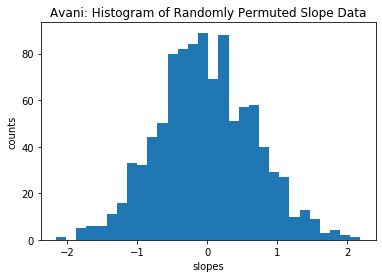

In [19]:
#T-test: compare the patterns observed to simple randomness using random permutations
avani_random = np.zeros(1000)
for x in range(1000):
    reshaped = permuted(avani).reshape(-1,1)
    avani_random[x] = LinearRegression().fit(cum_covid[['Cumulative_Cases']], reshaped).coef_

plt.hist(avani_random, bins=30)
plt.xlabel('slopes')
plt.ylabel('counts')
plt.title('Avani: Histogram of Randomly Permuted Slope Data')
plt.show()

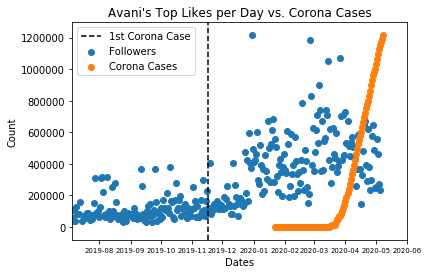

In [20]:
#Avani: Visualizing Avani's top likes per day since July 2019 vs number of corona cases in U.S. 

# **IMPORTANT NOTES** 
#Followers data has been normalized by 5 to visualize on same scale as Corona Cases
#The dashed line indicates the date of the first case of Coronavirus in China

#Avani's top likes per day vs number of corona cases in U.S. 
plt.scatter(dataset['avani'].dates.unique(), top_per_day('avani', 'diggCount')/5, label='Followers')
plt.scatter(cum_covid['Date'], cum_covid['Cumulative_Cases'], label='Corona Cases')
plt.xlim(datetime(2019, 7,5), datetime(2020, 6, 1))
plt.axvline(x=datetime(2019, 11, 17, 0, 0), color='k', linestyle='--', label = '1st Corona Case')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.legend()
plt.title("Avani's Top Likes per Day vs. Corona Cases")
plt.xlabel('Dates')
plt.ylabel('Count')
plt.show()

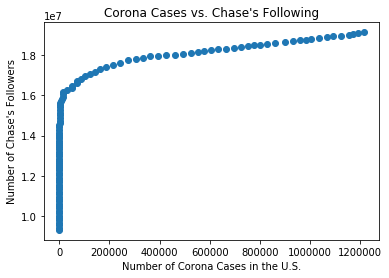

In [21]:
#Chase: Visualizing Corona Cases vs. Followers
chase = huddy_clout['followers'][0:108].tolist() #using follower data from the day of first case of corona onwards
chase.reverse()
plt.scatter(cum_covid['Cumulative_Cases'], chase)
plt.title("Corona Cases vs. Chase's Following")
plt.xlabel('Number of Corona Cases in the U.S.')
plt.ylabel("Number of Chase's Followers")
plt.show()

In [22]:
#Chase: Quantifying Relationshp Between Corona Cases vs. Followers 

#Fitting data to a linear regression
chase_2D = np.reshape(chase, (-1,1)) #convert data from 1D to 2D array 
chase_model = LinearRegression().fit(cum_covid[['Cumulative_Cases']], chase_2D)
chase_corona_slope = chase_model.coef_ 
chase_corona_corr = np.corrcoef(cum_covid['Cumulative_Cases'],chase)[0][1]
print('Slope of Linear Fit: ', chase_corona_slope[0][0])
print("Pearson Correlation of Chase's Followers & Corona Cases: ", chase_corona_corr)

Slope of Linear Fit:  6.050967554734983
Pearson Correlation of Chase's Followers & Corona Cases:  0.7567536987080903


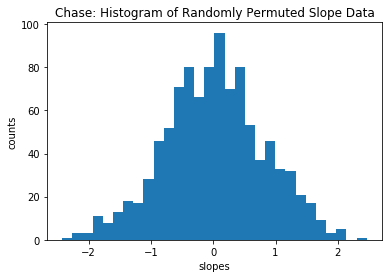

In [23]:
#T-test: Compare the patterns observed to simple randomness using random permutations
chase_random = np.zeros(1000)
for x in range(1000):
    reshaped = permuted(chase).reshape(-1,1)
    chase_random[x] = LinearRegression().fit(cum_covid[['Cumulative_Cases']], reshaped).coef_

plt.hist(chase_random, bins=30)
plt.xlabel('slopes')
plt.ylabel('counts')
plt.title('Chase: Histogram of Randomly Permuted Slope Data')
plt.show()

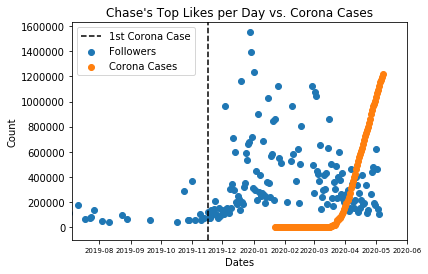

In [24]:
#Chase: Visualizing Chase's top likes per day since July 2019 vs number of corona cases in U.S. 

# **IMPORTANT NOTES** 
#Followers data has been normalized by 5 to visualize on same scale as Corona Cases
#The dashed line indicates the date of the first case of Coronavirus in China

#Chase's top likes per day vs number of corona cases in U.S. 
plt.scatter(dataset['lilhuddy'].dates.unique(), top_per_day('lilhuddy', 'diggCount')/5, label='Followers')
plt.scatter(cum_covid['Date'], cum_covid['Cumulative_Cases'], label='Corona Cases')
plt.xlim(datetime(2019, 7,5), datetime(2020, 6, 1))
plt.axvline(x=datetime(2019, 11, 17, 0, 0), color='k', linestyle='--', label = '1st Corona Case')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.legend()
plt.title("Chase's Top Likes per Day vs. Corona Cases")
plt.xlabel('Dates')
plt.ylabel('Count')
plt.show()

### Evaluation of Significance

As is evidenced by the plots above, there is a **postive, linear relationship** between the number of Coronavirus cases in the U.S. and the number of followers for all three creators (Charli, Avani, Chase). The data is summarized in the table below. 


|                   | Charli          | Avani           | Chase               |
|:------------------|:---------------:|:---------------:|:-------------------:|
| Slope             |  30.29| 6.24 |  6.05 | 
| Corr. Coef.       | 0.912  |0.882|     0.757 | 
| Random Slope Range| -10-7.5 | -2-2 | -2.25 - 2.25

As is evidenced by the table, the slopes were **>5** for all three creators and the correlation coefficents were **>0.75**. Furthermore, the slopes of each regression did not fall in the range of the randomly permuted slope data; this indicated that the difference between the real and the random slopes was statistically significant and illustrated that **these relationships were not observed due to simple randomness.** 

We also visualized the creator's top likes per day from July 1, 2019 - May 5, 2020. On this plot, we superimposed the plot of the coronavirus cases in the U.S. per day and indicated when the first case of coronavirus was diagnosed in China (Nov. 17, 2019). *These plots tell a story* - after the first case of coronavirus was recorded in China, we observe a sharp rise in followers that disperses into a cloud. Though nations were not sent into lockdown on this day, we speculate that many more Chinese citizens were staying home in response to the rise of the virus, and thus spending more time on TikTok. TikTok is very popular in China, with over 400 million Chinese viewers, thus seeing a surge in followers after the first case in China is congruent with the data. Furthermore, the rise in coronavirus cases in the U.S. is accompanied by the continued growth of these creators' following, which likely would have plateud without an increase in TikTok viewership. 

In conclusion, **there is a statistically significant correlation between the rise of coronavirus cases in the U.S. and the TikTok success of key Hype House members Charli, Avani, and Chase.**

**Note:** correlation is not equivalent to causation. It is also possible that their following would have taken on this trend regardless of the pandemic. Using data from other short-video platforms like Vine and the growth of their top creators overtime (during a period before the corona epidemic) and comparing that to Charli, Avani, and Chase's growth could be an interesting way to explore this question of correlation vs. causation. 

## How did joining Hype House affect the popularity of the members?

Many social media stars create a platform based on sharing their personal lives via vlogging. Often times, social media stars create exclusive social circles marketed toward their shared followers to boost relevance. The Hype House is TikTok's first instance of this marketing strategy, and we were interested in evaluating its success by analyzing each Hype House members' growth in popularity pre vs. post joining Hype House. 

The metric we used to measure of the user's popularity was Engagement Rate for each post, calculated as follows:  

$(Likes + Comments + Shares) / Views * 100$

We chose this metric over using a single variable such as follower count or view count because engagement rate takes into account several factors, giving a more comprehensive quantification of post popularity. 

The objective of this analysis is to: (1) determine how the each members' average Engagement Rate changed before/after joining Hype House, (2) analyze the correlation between these two variables, (3) determine the strength of the correlation. 

We hypothesize that joining Hype House will increase each member's mean engagement rates significantly and expect a positive correlation between the two variables. 

***
*Study Summary*

**Independent Variable:** Status in Hype House, Y/N represented by 1/0 in dataframes

**Dependent Variable:** Engagement Rates

Data Analysis Methodology:
- created bar graph representing mean engagement rate for each member before and after joining Hype House 
- created box plots to see the spread of the engagement rates for each member before and after joining Hype House 
- fitted a Linear Regression to the two variables 
- compared the relationship between the two variables to simple randomness 
- calculated Pearson Correlation Coefficient 

In [25]:
import datetime #re-import older version of datetime for remaining analysis 

In [26]:
#Calculating members' mean eng. rates before/after joining Hype House 

#empty arrays for storing mean eng. rates before/after Hype House
#will be used to create bar graph
hypehouse_members_e_rate_mean_after = []
hypehouse_members_e_rate_mean_before = []
e_rate_difference = []

for key in dataset:
    
    #using .loc to slice dataframe for posts made AFTER joining Hype House 
    after_hypehouse = dataset[key].loc[dataset[key]["dates"] >= datetime.date(2019,12,19)]
    e_rate_mean_after_hypehouse = round(after_hypehouse["Engagement Rates"].mean(),3)
    hypehouse_members_e_rate_mean_after.append(e_rate_mean_after_hypehouse)
    
    #using .loc to slice dataframe for posts made BEFORE joining Hype House 
    before_hypehouse = dataset[key].loc[dataset[key]["dates"] < datetime.date(2019,12,19)]
    e_rate_mean_before_hypehouse = round(before_hypehouse["Engagement Rates"].mean(), 3)
    hypehouse_members_e_rate_mean_before.append(e_rate_mean_before_hypehouse)
    
    #calculating the difference in means before and after joining Hype House 
    difference_mean_avg = round((e_rate_mean_after_hypehouse - e_rate_mean_before_hypehouse),3)
    e_rate_difference.append(difference_mean_avg)

In [27]:
#creating a dataframe of the values computed above
engagement_rate_dataset = pd.DataFrame({'User': hypehouse_members_names, 
                                        'Mean Engagement Rate Before Joining Hype House (%)': hypehouse_members_e_rate_mean_before, 
                                        'Mean Engagement Rate After Joining Hype House (%)': hypehouse_members_e_rate_mean_after, 
                                        'Difference in Means Before/After Joining Hype House (%)': e_rate_difference})

#displaying the dataframe for easier viewing of the values
engagement_rate_dataset.head(n = 16)

,User,Mean Engagement Rate Before Joining Hype House (%),Mean Engagement Rate After Joining Hype House (%),Difference in Means Before/After Joining Hype House (%)
0,thehypehouse,NaN,16.285,NaN
1,charlidamelio,11.464,14.078,2.614
2,avani,18.745,21.349,2.604
3,tonylopez,14.587,18.434,3.847
4,k0uvr,15.711,18.412,2.701
5,jackwright,7.967,19.685,11.718
6,jameswright,12.182,20.133,7.951
7,ondreazlopez,13.219,18.988,5.769
8,addisonre,12.249,15.681,3.432
9,alexwarren,14.961,21.065,6.104


**NOTE:** thehypehouse account's mean engagement rate before joining Hype House is 'nan' because the channel did not exist before the formation of Hype House 

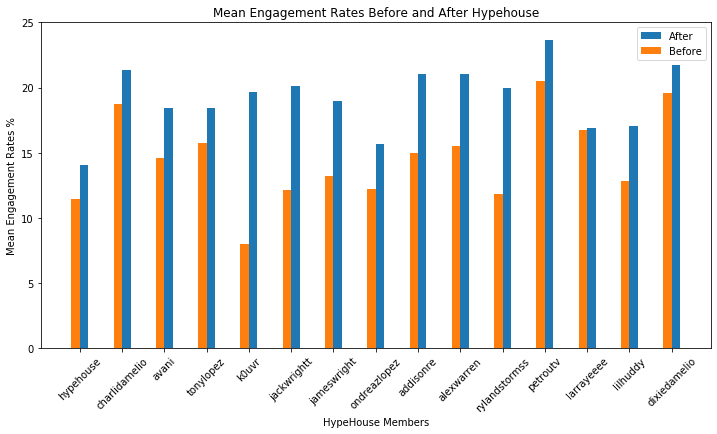

In [28]:
#Creating bar graph to visualize mean engagement rates 
N = 15
fig, ax = plt.subplots(figsize=(12,6))
ind = np.arange(N) #the x axis locations for the Hypehouse members 
width = 0.2
m1 = ax.bar(ind, hypehouse_members_e_rate_mean_after[1:], width=0.2, align="center") #bars with engagement rate means after joining Hype House
m2 = ax.bar(ind-0.2, hypehouse_members_e_rate_mean_before[1:], width=0.2, align="center") #bars with engagement rate means before joining Hype House 

#Setting up axes/labels of bar graphs 
ax.set_title("Mean Engagement Rates Before and After Hypehouse")
ax.set_xticks(ind - 0.1)
ax.set_xticklabels(("hypehouse","charlidamelio", "avani", "tonylopez", "k0uvr", "jackwrightt", "jameswright", "ondreazlopez", "addisonre", "alexwarren","rylandstormss", "petroutv", "larrayeeee", "lilhuddy","dixiedamelio", "nickaustin"))
ax.legend((m1[0], m2[0]), ('After', 'Before'))
ax.autoscale_view()
plt.ylim((0,25))
plt.xticks(rotation=45)
plt.xlabel("HypeHouse Members")
plt.ylabel("Mean Engagement Rates %")
plt.show()

In [29]:
#temporary boxplot to exclude thehypehouse account as it is not applicable to this part of the analysis
boxplot_dataset = {}
for member in range(len(hypehouse_members_data))[1:]:
    boxplot_dataset.update({hypehouse_members_names[member]: hypehouse_members_data[member]})

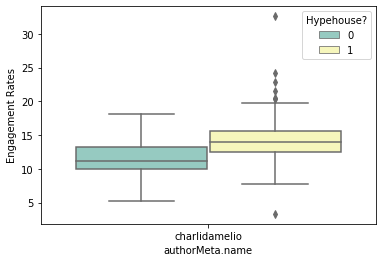

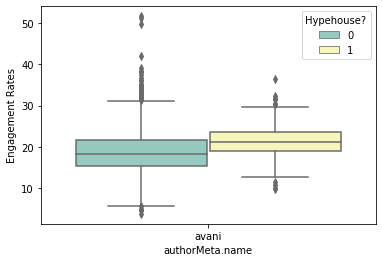

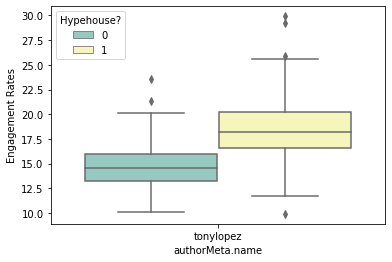

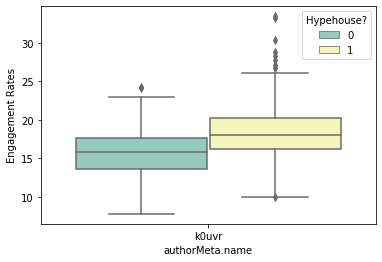

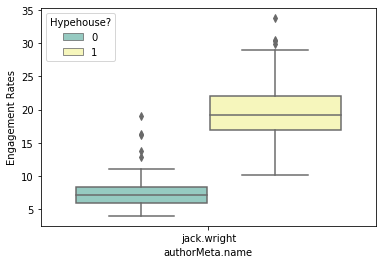

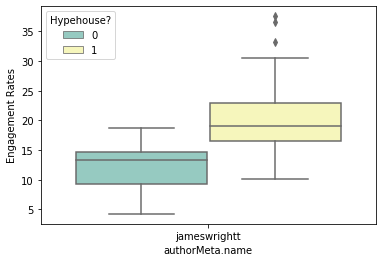

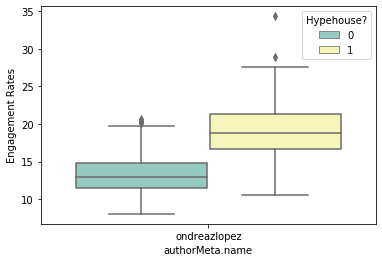

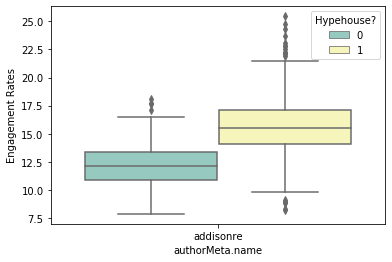

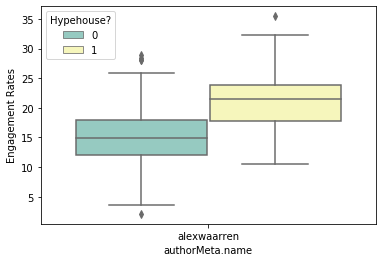

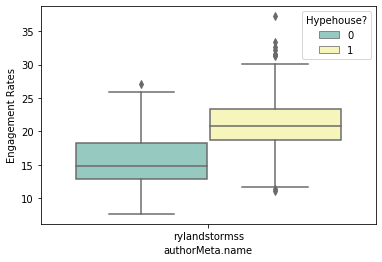

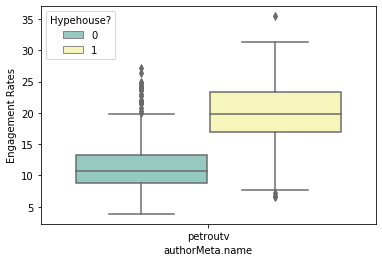

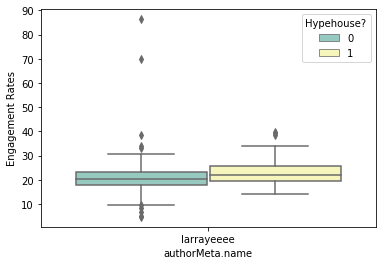

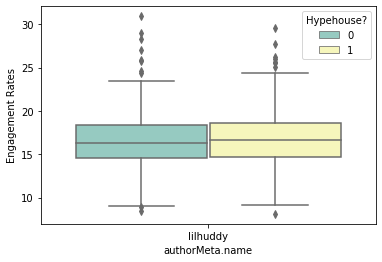

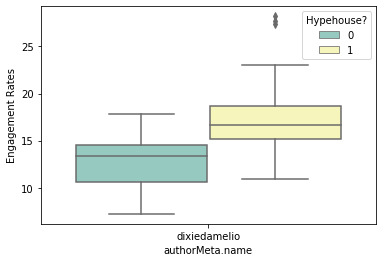

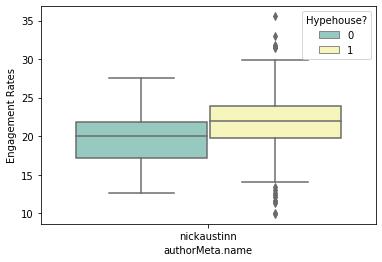

In [30]:
# Creating a barplot for each member comparing engagement rates before and after joining Hype House
for key in boxplot_dataset:
    bplot = sns.boxplot(y = dataset[key]["Engagement Rates"], x = dataset[key]["authorMeta.name"], data = pd.melt(dataset[key]), hue = dataset[key]["Hypehouse?"], palette = 'Set3')
    plt.show()

**NOTE:** "0" refers to before and "1" refers to after joining Hype House

In [31]:
#Empty arrays to store values
reg_slope_e_given_date_before_hypehouse = []
corrcoef_e_and_date_before_hypehouse = []
reg_slope_e_given_date_after_hypehouse = []
corrcoef_e_and_date_after_hypehouse = []

#For loop to calculate linear regressions/corrcoef for each member
for key in dataset: 
    copy_df = dataset[key].copy() #copy of dataframe bc dates column will be adjusted just for this regression
    index_when_hypehouse_joined = copy_df[copy_df["dates"] <= datetime.date(2019,12,19)].index[0] #finding index of first post after formation of HypeHouse
    copy_df["dates"] = copy_df["dates"].map(datetime.datetime.toordinal) #changing type of date from datetime to ordinal bc LinearRegression cannot use datetime obj

    #model of Engagement Rates given dates upto when Hype House 
    before_hypehouse = copy_df.iloc[index_when_hypehouse_joined:]
    model_1 = (LinearRegression().fit(before_hypehouse[["dates"]], before_hypehouse["Engagement Rates"])).coef_[0]
    reg_slope_e_given_date_before_hypehouse.append(model_1)

    #corr of Engagement Rates and Dates upto when Hype House 
    corrcoef_e_rate_and_dates_before = np.corrcoef((before_hypehouse["dates"]), (before_hypehouse["Engagement Rates"]))[0,1]
    corrcoef_e_and_date_before_hypehouse.append(corrcoef_e_rate_and_dates_before)

    #model of Engagement Rates given Dates after formation of Hype House 
    after_hypehouse = copy_df.iloc[0:index_when_hypehouse_joined]
    model_2 = (LinearRegression().fit(after_hypehouse[["dates"]], after_hypehouse["Engagement Rates"])).coef_[0]
    reg_slope_e_given_date_after_hypehouse.append(model_2)
    
    #corr of Engagement Rates and Dates after formation of Hype House
    corrcoef_e_rate_and_dates_after = np.corrcoef((after_hypehouse["dates"]), (after_hypehouse["Engagement Rates"]))[0,1]
    corrcoef_e_and_date_after_hypehouse.append(corrcoef_e_rate_and_dates_after)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [32]:
#creating a dataframe of the values computed above
regression_data_dataset = pd.DataFrame({'User': hypehouse_members_names, 
                                        'Regression slope of Engagement Rates given Dates Before Joining Hype House': reg_slope_e_given_date_before_hypehouse, 
                                        'Correlation coefficient of Engagement Rates and Dates Before Joining Hype House': corrcoef_e_and_date_before_hypehouse, 
                                        'Regression slope of Engagement Rates given Dates After Joining Hype House': reg_slope_e_given_date_after_hypehouse, 
                                        'Correlation coefficient of Engagement Rates and Dates After Joining Hype House': corrcoef_e_and_date_before_hypehouse})
#displaying the dataframe for easier viewing of the values
regression_data_dataset.head(n = 16)

,User,Regression slope of Engagement Rates given Dates Before Joining Hype House,Correlation coefficient of Engagement Rates and Dates Before Joining Hype House,Regression slope of Engagement Rates given Dates After Joining Hype House,Correlation coefficient of Engagement Rates and Dates After Joining Hype House
0,thehypehouse,0.000000,NaN,0.058141,NaN
1,charlidamelio,-0.013069,-0.295642,0.025638,-0.295642
2,avani,-0.013458,-0.349262,0.055658,-0.349262
3,tonylopez,0.003694,0.070054,0.023668,0.070054
4,k0uvr,0.027413,0.561519,0.027171,0.561519
5,jackwright,0.025328,0.536642,0.084633,0.536642
6,jameswright,0.005773,0.108301,0.106892,0.108301
7,ondreazlopez,0.016397,0.384985,0.048605,0.384985
8,addisonre,0.013666,0.328907,0.022274,0.328907
9,alexwarren,-0.001141,-0.050690,0.065572,-0.050690


### Evaluation of Significance: Bar Graph and Boxplot 

The bar graph shows **increases in mean engagement rate of posts'** for each Hype House member, however the **increases greatly vary** among them. For example, lilhuddy and charlidamelio's accounts show minute increases of 0.151% and 2.146% compared to members jackwright and petroutv's increases of 11.718% and 8.093%. 

To visualize each member's posts before and after joining Hype House, we created boxplots and observed that **each member’s median engagement rates and spread increased in varying magnitudes.** Charlidamelio and avani’s new median engagement rate rose close to their original 75th percentile. Other members like jackwright and jameswright saw even greater increases in engagement rate per post. Jackwright’s spread of engagement rates increased from 3.92% - 18.98% to 10.13% - 33.80% and jameswright’s from 4.14% - 18.66% to 10.20% - 37.55%. Despite rising engagement rates for each member after joining Hype House, there is variation in the extent of increase. 

### Evaluation of Significance: Linear Regression and Correlation Coefficients 

To analyze **members' engagement rate growth over time** Linear Regression models for each member before and after the formation of Hype House (12/19/2019) were created. We calculated the models' slopes and correlation coefficients of dates(X) and engagement rates(Y). 

We hypothesized that **slopes would increase positively after joining Hype House**, engagement rates of members’ posts would increase more per day, compared to before joining Hype House. We also hypothesized that **correlation coefficients would also increase positively in strength** after joining Hype House. 

We saw that our hypotheses were naive expectations. **The regression’s slopes were close to 0** ranging from (-0.013 - 0.108) for the engagement rate models before joining Hype House and from (0.022 - 0.142) for the models after joining Hype House. This proximity to 0 suggests a **weak pattern.** 

**We observed that correlation coefficients increased as we had hypothesized, but again saw varying increases.** Some TikTok members had large increases in correlation coefficient like jameswright which went from 0.108 to 0.700 after joining Hype House and others minute differences like rylandstorms which went from 0.519 to 0.552. Some even had decreasing correlation coefficients like k0uvr which went from 0.562 to 0.306. 

**However, what we found most interesting is that the slopes and correlation coefficients of several users changed from negative to positive after joining Hype House.** These users are charlidamelio, avani, alexwarren, larrayeeee, lilhuddy, and nickaustin. 

 

|                   | charlidamelio   | avani           | alexwarren          |  larrayeeee | lilhuddy | nickaustin| 
|:------------------|:---------------:|:---------------:|:-------------------:|:-----------:|:--------:|:---------:|
| Slope Before Hype House       |  - 0.013 | -0.013     | -0.001              |  -0.003     | -0.012   | -0.071    |
| Slope After Hype House        |  0.026   | 0.056      | 0.066               |  0.142      | 0.036    | 0.045     |
| Corr. Coef Before Hype House  |  -0.296  | -0.349     | -0.051              |  -0.138     | -0.551   | -0.350    |
| Corr. Coef After Hype House   |  0.408   | 0.605      | 0.576               |  0.788      | 0.482    | 0.481     |
 
A negative slope and correlation implies that **these members’ posts’ engagement rates were decreasing, albeit minimally** from their account’s creation to the point that they joined Hype House. After joining Hype House charlidamelio's slope increased x3 in the positive direction, avani's ~x5, alexwarren's and larrayeee's slopes both by large factors x67 and x48, lilhuddy's by x4, and nickaustin's x1.63. **It is interesting to note that excluding nickaustin they’re the members of Hype House who have been active on TikTok the longest from 1-4 years.** Additionally, these users’ mean engagement rates didn’t change drastically as observed in the bar graph above, except for alexwarren. These factors led us to infer that for these users **Hype House was used to maintain their account's relevance rather than to shoot them into fame.** Despite their established presence on the app, over time their engagement rates were slightly decreasing, this however changed to be slightly increasing after joining Hype House. 

**Note:** We suspect that, in addition to joining Hype House, there are other factors which Hype House members benefitted from and we will proceed to look at other facets of this data in the sections below. 

## Which Hype House member collaborations garner the most success?

The Hype House members are a close-knit group, but some relationships are stronger than others. This portion of the analysis determines certain collaborations between Hype House members as well as with other creators. Moreover, the various collaborations are compared with others to gauge their success based on Like, Share, Play, and Comment counts. Lastly, the popularity of the type of pairs is compared. 

After conducting research on individual members, we identified several pairs that stood out the most. These pairs were bonded based on friendship, siblings, or intimate relationships:

|             Pair      | Type       | 
|:------------------:|:---------------:|
| Charli Damelio and Dixie Damelio|Siblings| 
| Charli Damelio and Chase Hudson (a.k.a lilhuddy)| Intimate Relationship  |  
| Kouvr Annon and Alex Warren | Intimate Relationship |
| Addion Re and Dixie Damelio | Friends |
| Jack Wright and James Wright | Siblings |
| Tony Lopez and Ondreaz Lopez | Siblings |
|Addison Rae and Bryce Hall | Intimate Relationship |
|Avani Gregg and Anthony Reeves | Intimate RElationship |

***
*Study Summary*

Data Analysis Methodology:
-	Determined unidentified pairs using mention count
-	Totaled likes, shares, plays, and comments of 10 pairs
-	Compared the total engagement rate of collaborations 
-	Calculated the average likes, shares, plays, and comments per video for each pair
-	Contrasted the averages between relationships, friends, and siblings in the Hype House

**Note:** Anthony Reeves and Bryce Hall are not members of the Hype House but were included as romantic partners of Hype House members.

In [33]:
#Create a dataset for pairs that include members outside of Hype House

dataset_for_pairs = dataset.copy() #copy current dataset

luvanthony = pd.read_csv("cleandata/luvanthony.csv") 
brycehall = pd.read_csv("cleandata/brycehall.csv")
dataset_for_pairs["luvanthony"] = luvanthony
dataset_for_pairs["brycehall"] = brycehall
members = hypehouse_members_names[1:] #exclude the 'thehypehouse' profile from members

#add new members to the list of members for pairs
members.append("luvanthony") 
members.append("brycehall")

Although these relationships were the most talked about in the public, there were some Hype House members that were not much highlighted. To determine closer bonding between other members, we looked at the number of times each member mentioned (using ‘@’) the other in their videos. Creators typically mention others in their caption when collaborating in a video. The name and the number of mentions of each member is shown below:

In [34]:
#Function that returns top 5 mentions of members for pairs
def mentions_top5 (m) :
    mentions_list = []
    #for every member in the list of members for pairs
    for name in members:
        #create a df of all mentions of that member by member 'm'
        mentions = dataset_for_pairs[m][dataset_for_pairs[m]["mentions"].str.contains("@" + name)] 
        mentions_list.append((name, len(mentions)))
    if mentions_list != []:
        #sort the list in ascending order
        mentions_list.sort(key = lambda x: x[1])
        return mentions_list[-5:]

In [35]:
#For every member in list of members for pairs, print the name and top 5 mentions and their counts
for member in members:
    print("Top 5 mentions and their counts by " +member+':')
    print(mentions_top5(member))
    print()

Top 5 mentions and their counts by charlidamelio:
[('petroutv', 5), ('tonylopez', 7), ('avani', 12), ('dixiedamelio', 25), ('lilhuddy', 45)]

Top 5 mentions and their counts by avani:
[('lilhuddy', 9), ('nickaustin', 10), ('charlidamelio', 14), ('addisonre', 14), ('luvanthony', 40)]

Top 5 mentions and their counts by tonylopez:
[('lilhuddy', 3), ('charlidamelio', 5), ('nickaustin', 6), ('addisonre', 7), ('ondreazlopez', 92)]

Top 5 mentions and their counts by k0uvr:
[('avani', 2), ('charlidamelio', 3), ('addisonre', 3), ('petroutv', 4), ('rylandstorms', 6)]

Top 5 mentions and their counts by jackwright:
[('ondreazlopez', 5), ('charlidamelio', 6), ('addisonre', 6), ('avani', 12), ('jameswright', 60)]

Top 5 mentions and their counts by jameswright:
[('charlidamelio', 1), ('lilhuddy', 1), ('ondreazlopez', 3), ('addisonre', 3), ('avani', 5)]

Top 5 mentions and their counts by ondreazlopez:
[('lilhuddy', 1), ('ondreazlopez', 2), ('luvanthony', 2), ('charlidamelio', 4), ('tonylopez', 60

This not only helped us identify new pairs in the Hype House, but also supported the aforementioned bonds. The following pairs were identified in addition to the ones previously listed:

|             Pair      | Type       | 
|:------------------:|:---------------:|
| Thomas Petrou and Chase Hudson|Friends| 
| Ryland Storms and Nick Austin | Friends  |

In [36]:
#Final nested list of pairs
pairs = [("charlidamelio","dixiedamelio"), ("charlidamelio", "lilhuddy"), ("k0uvr", "alexwarren"), ("petroutv", "lilhuddy"), 
         ("addisonre", "dixiedamelio"), ("jackwright", "jameswright"), ("tonylopez","ondreazlopez"), ("addisonre", "brycehall"),
         ("avani", "luvanthony"), ("rylandstorms", "nickaustin")]

#Metrics to extract from dataframes
metrics = ["diggCount", "shareCount", "playCount", "commentCount"]

Two dictionaries of the total and avg/video number of likes, shares, plays, and comments of each pair are assigned below:

In [37]:
dic_for_avgs = {"diggCount":[],"shareCount": [], "playCount": [], "commentCount": []} #dictionary for average per video
videos_list = [] #list of total number of collaborated videos of each pair
dic_for_totals = {"diggCount":[],"shareCount": [], "playCount": [], "commentCount": []} #dictionary for total counts

#for every pair in the list of pairs
for pair in pairs:
    #mentions by 1st member of the other(df_1), mentions by 2nd member of the other(df_2), and mentions by hypehouse page(df_3)
    df_1 = dataset_for_pairs[pair[0]][dataset_for_pairs[pair[0]]["mentions"].str.contains("@" + pair[1])]
    df_2 = dataset_for_pairs[pair[1]][dataset_for_pairs[pair[1]]["mentions"].str.contains("@" + pair[0])]
    df_3 = dataset_for_pairs["thehypehouse"][dataset_for_pairs["thehypehouse"]["mentions"].str.contains("@" + pair[0]) & 
                                   dataset_for_pairs["thehypehouse"]["mentions"].str.contains("@" + pair[1])]
    
    #add the total number of videos made in collaboration to videos_list
    videos = len(df_1) + len(df_2) + len(df_3)
    videos_list.append(videos)
    
    #for every metric(likes,shares,etc) in metrics for every pair^^
    for metric in metrics:
        #sum up the values of the metric from each dataframe
        sum_1 = df_1[metric].sum()
        sum_2 = df_2 [metric].sum()
        sum_3 = df_3[metric].sum()
        
        #total number of the metric for that pair
        total = sum_1 + sum_2 + sum_3
        #average number of the metric per video for that pair
        avg = total / videos
        
        dic_for_totals[metric].append(total)
        dic_for_avgs[metric].append(avg)

To determine the overall popularity, we plotted the engagement rate of each pair on a bar graph

Mean:17.43
Standard Deviation:2.64


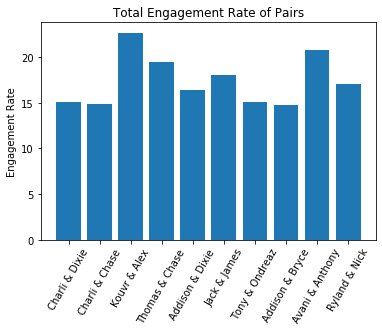

In [38]:
#Plot a bar graph of the engagement rate of each pair
total_engagement = []
for i in range(len(pairs)):
    #engagement = total likes, share, and comments of a pair divided by the total plays/views
    engagement = ((dic_for_totals["diggCount"][i] + dic_for_totals["shareCount"][i] + 
                  dic_for_totals["commentCount"][i]) / dic_for_totals["playCount"][i])*100
    
    total_engagement.append(engagement)

plt.bar(np.arange(len(pairs)), total_engagement)
plt.xticks(np.arange(len(pairs)), ("Charli & Dixie", "Charli & Chase", "Kouvr & Alex", "Thomas & Chase", 
                                   "Addison & Dixie", "Jack & James", "Tony & Ondreaz", "Addison & Bryce", 
                                   "Avani & Anthony", "Ryland & Nick"), rotation=60)
plt.ylabel("Engagement Rate")
plt.title("Total Engagement Rate of Pairs")
print("Mean:{:.2f}".format(np.mean(total_engagement)))
print("Standard Deviation:{:.2f}".format(np.std(total_engagement)))
plt.show()

Based on the plot, **‘Kouvr & Alex’ (22.6%), ‘Thomas & Chase’(19.51%), and ‘Jack & James’ (15.04%)** seem to be the most popular among pair types (siblings, friends, and intimate relationships). Other pairs had similar engagement rates except for ‘Avani & Anthony’ (20.79%). Nevertheless, a deeper analysis was required before making any conclusions. 

Below you can find the number of collaboration videos created by each pair with a statistical summary.

Max: 161
75th Percentile: 81.75
Mean: 77.4
Median: 57.0
25th Percentile 55.25
Min: 36
Standard Deviation:43.79


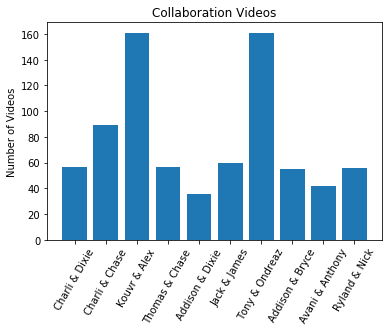

In [39]:
#Plot a bar graph of the number of videos made by each pair together
plt.bar(np.arange(len(pairs)), videos_list) #videos_list is the list of videos created by each pair
plt.xticks(np.arange(len(pairs)), ("Charli & Dixie", "Charli & Chase", "Kouvr & Alex", "Thomas & Chase", 
                                   "Addison & Dixie", "Jack & James", "Tony & Ondreaz", "Addison & Bryce", 
                                   "Avani & Anthony", "Ryland & Nick"), rotation=60)
plt.ylabel("Number of Videos")
plt.title("Collaboration Videos")

print("Max:", max(videos_list))
print("75th Percentile:", np.percentile(videos_list,75))
print("Mean:", np.mean(videos_list))
print("Median:", np.median(videos_list))
print("25th Percentile", np.percentile(videos_list,25))
print("Min:", min(videos_list))
print("Standard Deviation:{:.2f}".format(np.std(videos_list)))
plt.show()

‘Kouvr & Alex’ made 161 videos compared to 57 by ‘Thomas & Chase’ and 60 by ‘Jack & James’, which are even less compared to other pairs. Also, ‘Tony & Ondreaz’ made 161 videos, but their videos were not as successful as ‘Kouvr & Alex’ collaborations. ***Are some pairs trying too hard to get popular?***

Below we plot the average likes, shares, plays, and comments per video to breakdown the components of the engagement rate and account for differences in the number of videos uploaded. 

Mean diggCounts:1645317
Standard Deviation:1326050


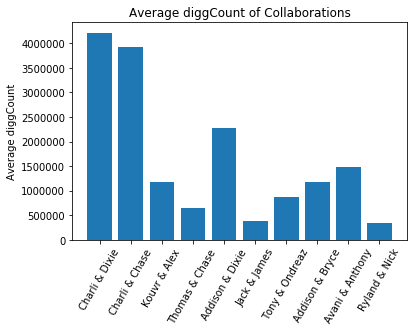

Mean shareCounts:21240
Standard Deviation:16944


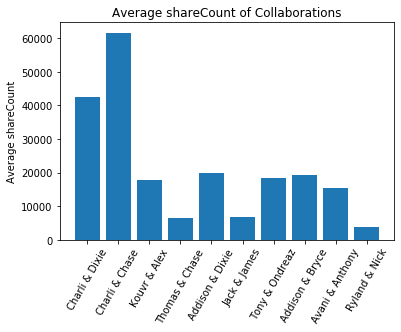

Mean playCounts:10354374
Standard Deviation:9314253


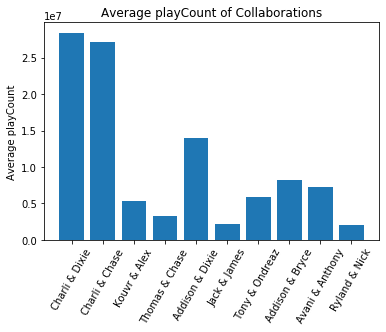

Mean commentCounts:9868
Standard Deviation:10235


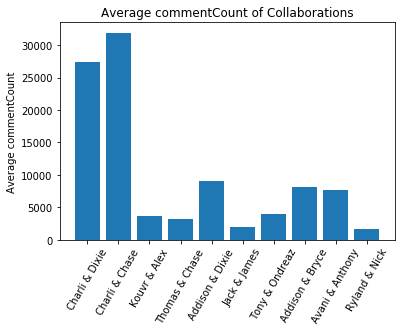

In [40]:
#Play 4 bar graphs of the average number of a metric per video for each pair
for metric in metrics:
    plt.bar(np.arange(len(pairs)), dic_for_avgs[metric])
    plt.xticks(np.arange(len(pairs)), ("Charli & Dixie", "Charli & Chase", "Kouvr & Alex", "Thomas & Chase", 
                                       "Addison & Dixie", "Jack & James", "Tony & Ondreaz", "Addison & Bryce", 
                                       "Avani & Anthony", "Ryland & Nick"), rotation=60)
    plt.ylabel("Average "+ metric)
    plt.title("Average " + metric + " of Collaborations")
    print("Mean " + metric + "s:{:.0f}".format(np.mean(dic_for_avgs[metric])))
    print("Standard Deviation:{:.0f}".format(np.std(dic_for_avgs[metric])))
    plt.show()

### Evaluation of Significance: Part I

Comparing among the type of pairs, **‘Charli & Dixie’** are most popular among siblings, **‘Charli & Chase’** among intimate relationships, and **‘Addison & Dixie’** among friends:

#### <center> Charli & Dixie Compared To Other Siblings </center> 

|                   | Likes          | Shares           | Plays               | Comments|
|:------------------|:---------------:|:---------------:|:-------------------:|:-------------------:|
| Jack & James             |  11.10x| 6.21x |  13.22x | 13.75x |
| Tony & Ondreaz       | 4.87x  |2.30x|     4.82x | 6.87x |

__Summary__: Charli & Dixie are about **5 times and 10 times** more popular than 'Tony & Ondreaz' and 'Jack & James' respectively

#### <center> Charli & Chase Compared To Other Intimate Relationships </center> 
|                   | Likes          | Shares           | Plays               | Comments|
|:------------------|:---------------:|:---------------:|:-------------------:|:-------------------:|
| Kouvr & Alex             |  3.35x| 3.48x |  5.15x | 8.70x |
| Addison & Bryce       | 3.34x  |3.18x|     3.33x | 3.95x |
| Avani & Anthony       |     2.66x   |4.03     | 3.77x          |   4.17x    |

__Summary__: Charli & Chase are about **3 times** more popular than other intimate relationships in the Hype House

#### <center> Addison & Dixie Compared To Other Friends </center> 

|                   | Likes          | Shares           | Plays               | Comments|
|:------------------|:---------------:|:---------------:|:-------------------:|:-------------------:|
| Thomas & Chase             |  3.55x| 3.02x |  4.20x | 2.81x |
| Ryland & Nick       | 6.75x  |5.00x|     6.99x | 5.34x |

__Summary__: Addison & Dixie are about **3 times and 6 times** more popular than 'Thomas & Chase' and 'Ryland & Nick' respectively

It is interesting to note the following as well:
-	‘Charli & Dixie’ and ‘Charli & Chase’ are head to head to become the most popular
-	‘Tony & Ondreaz’ and ‘Kouvr & Alex’ are way less popular compared to the number of videos they make
-	The friendship between ‘Addison & Dixie’ gains more attention than the relationship between ‘Addison & Bryce’
-	‘Thomas & Chase’ and ‘Jack & James’ are not that popular, but are more engaging (the percentage of likes, shares, comments from number of plays)



Lastly, we compared the total popularity across the type of pairs below

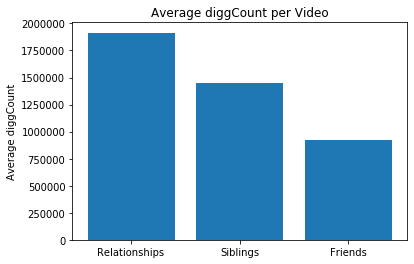

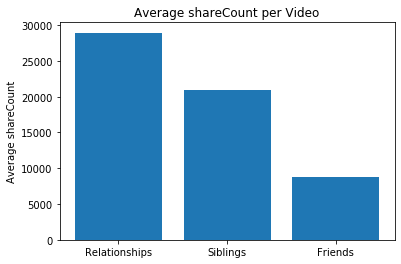

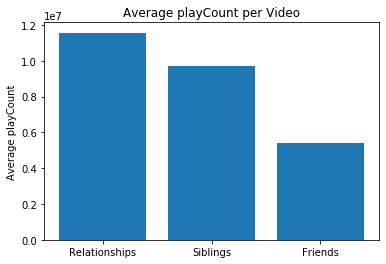

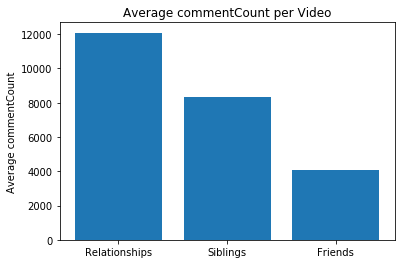

In [41]:
#for every metric (likes,share,plays, and comments)
for metric in metrics:
    #Total number of the metric by certain pairs divided by the total number of videos made by those pairs
    
    #Charli & Chase, Kouvr & Alex, Addison & Bryce, and Avani & Anthony
    relationships = (dic_for_totals[metric][1] + dic_for_totals[metric][2] + dic_for_totals[metric][7] + 
                    dic_for_totals[metric][8]) / (videos_list[1] + videos_list[2] + videos_list[7] + videos_list[8])
    
    #Charli & Dixie, Jack & James, and Tony & Ondreaz
    siblings = (dic_for_totals[metric][0] + dic_for_totals[metric][5] + 
                dic_for_totals[metric][6]) / (videos_list[0] + videos_list [5] + videos_list[6])
    
    #Thomas & Chase, Addison & Dixie, and Ryland & Nick
    friends = (dic_for_totals[metric][3] +dic_for_totals[metric][4] + 
               dic_for_totals[metric][9]) / (videos_list[3] + videos_list[4] + videos_list[9])
    
    plt.bar(np.arange(3), [relationships, siblings, friends])
    plt.ylabel("Average "+ metric)
    plt.xticks(np.arange(3), ("Relationships", "Siblings", "Friends"))
    plt.title("Average "+metric+ " per Video")
    
    plt.show()

### Evaluation of Significance: Part II

#### <center> Intimate Relationships Compared To Siblings and Friends </center> 

|                   | Likes          | Shares           | Plays               | Comments|
|:------------------|:---------------:|:---------------:|:-------------------:|:-------------------:|
| Siblings             |  1.32x| 1.38x |  1.38x | 1.45x |
| Friends       | 2.08x  |3.29x|     2.13x | 2.97x |

__Summary__: Relationships are 1.5 times and 2.5 times more popular than siblings and friends respectively

__Conclusion__: Based on the above analysis, we can conclude the following:
- Charli & Dixie are the most popular siblings in the Hype House
- Charli & Chase are the most popular partners in the Hype House
- Addison & Dixie are the most popular friends in the Hype House
- Kouvr & Alex and Tony & Ondreaz both have a lot of videos together, but they are not as successful as their peers'
- Intimate relationships are more popular than siblings and friendships in the Hype House

## Is there a Correlation between the Length of a TikTok and its Success?

TikTok allows creators to make videos that are at most 1 minute in length. This short-video approach is largely responsible for the explosive, viral success of the app and of top creators on the app. TikToks are addictive - since each video is less than a minute long, (1) there is less committment involved in starting and watching a video, (2) it gives the illusion that a viewer is spending less time on the app, and (3) the short videos are easy to share with friends. 

We were interested in exploring if, even with a cap of only 60 seconds, videos of a certain length within that 0-60 second time range are watched more, liked more, and shared more than others. TikTok offers **two built-in length options, 15-sec and 60-sec**; however, the user has the liberty to upload videos of any length within 1-60 seconds as well. Thus, we hypothesized that videos 15-second videos will amass the most likes, plays, and shares as they are the shorter of the two built-in length options. The objective of this analysis is to: determine if there is a correlation between the length of a TikTok and its success.

***
*Study Summary*

**Independent Variable:** Video Duration (1-60 sec)  **Depedent Variable(s):** Median Likes/Shares/Plays 

Data Analysis Methodology: 
- calculate the mode of video duration across all Hype House members' videos
- calculate the median number of likes/shares/plays for videos of given length across all Hype House members' videos
- record the length of the videos with highest median number of likes/shares/plays
- bar plot of video duration vs. median number of likes/shares/plays

In [42]:
#create a cumulative set of duration for all tiktok videos made by hype house members and the corresponding likes on each video
tot_duration = []
tot_likes = []
for user in hypehouse_members_names:
    tot_duration.append(dataset[user]['videoMeta.duration'].values)
    tot_likes.append(dataset[user]['diggCount'].values)

tot_duration = np.concatenate(tot_duration).ravel().tolist() #flatten the list of arrays
tot_likes = np.concatenate(tot_likes).ravel().tolist() #flatten the list of arrays

In [43]:
#Mode of video duration across all Hype House members
print("The most frequent length (mode) of Hype House members' vidoes is: ", stats.mode(tot_duration)[0][0], ' seconds')

The most frequent length (mode) of Hype House members' vidoes is:  15  seconds


In [44]:
#Calculate median number of LIKES for vidoes of respective length [0-60 sec]
lengths = list(range(1,61))
med_likes_per_len = {} #dictionary storing length of video (key) and average number of likes for a video of that length (value)
for length in lengths: 
    tot_likes_inrange = []
    for user in hypehouse_members_names:
        vids = dataset[user][dataset[user]['videoMeta.duration']==length]
        tot_likes_inrange.append(vids['diggCount'].values)
    tot_likes_inrange = np.concatenate(tot_likes_inrange).ravel().tolist() #flatten the list of arrays
    if (len(tot_likes_inrange)>15): #must be at least 20 vidoes of that length to be included
        med_likes_per_len.update({length:np.median(tot_likes_inrange)})
    else: 
        med_likes_per_len.update({length:0})

In [45]:
#Find video length which has the highest median number of likes across all Hype House accounts
max_med_likes = max(med_likes_per_len.values())
max_keys = [k for k, v in med_likes_per_len.items() if v == max_med_likes]

print('Maximum median like count: ', max_med_likes)
print('Video length with highest median # of likes across all Hype House accounts: ', max_keys[0], 'seconds')

Maximum median like count:  582268.0
Video length with highest median # of likes across all Hype House accounts:  15 seconds


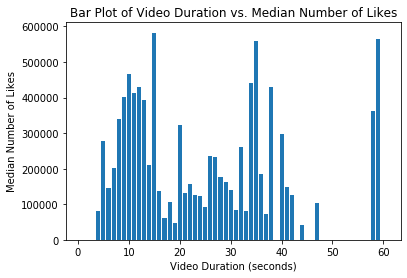

In [46]:
#Bar plot of median number of likes for each video duration (across all Hype House members)
#**NOTE** Some bars are absent because the median was only calculated if there were more than 15 videos of that length  
plt.bar(med_likes_per_len.keys(), med_likes_per_len.values())
plt.title('Bar Plot of Video Duration vs. Median Number of Likes')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Median Number of Likes')
plt.show()

In [47]:
#Sort the dictionary by value to see which video lengths get the most likes and save as dataframe
sorted_likes = {k: v for k, v in sorted(med_likes_per_len.items(), key=lambda item: item[1])}
df_ranked_likes = pd.DataFrame.from_dict(sorted_likes, orient = 'index')
df_ranked_likes.rename(columns={ df_ranked_likes.columns[0]: "Median likes" }, inplace = True)
df_ranked_likes = df_ranked_likes.sort_values(by='Median likes', ascending=False)
display(df_ranked_likes)

,Median likes
15,582268.0
59,563867.0
35,559802.5
10,466281.0
34,442082.0
12,430050.0
38,429314.0
11,412311.0
9,401469.0
13,391831.5


In [48]:
#Calculate median number of SHARES for vidoes of respective length [0-60 sec]
lengths = list(range(1,61))
med_shares_per_len = {} #dictionary storing length of video (key) and average number of likes for a video of that length (value)
for length in lengths: 
    tot_shares_inrange = []
    for user in hypehouse_members_names:
        vids = dataset[user][dataset[user]['videoMeta.duration']==length]
        tot_shares_inrange.append(vids['shareCount'].values)
    tot_shares_inrange = np.concatenate(tot_shares_inrange).ravel().tolist() #flatten the list of arrays
    if (len(tot_shares_inrange)>15): #must be at least 20 vidoes of that length to be included
        med_shares_per_len.update({length:np.median(tot_shares_inrange)})
    else: 
        med_shares_per_len.update({length:0})

In [49]:
#Find video length which has the highest median number of shares across all Hype House accounts
max_med_shares = max(med_shares_per_len.values())
max_keys = [k for k, v in med_shares_per_len.items() if v == max_med_shares]

print('Maximum median Share count: ', max_med_shares)
print('Video length with highest median # of Shares across all Hype House accounts: ', max_keys[0], 'seconds')

Maximum median Share count:  8064.5
Video length with highest median # of Shares across all Hype House accounts:  59 seconds


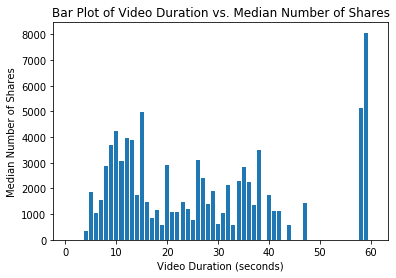

In [50]:
#Bar plot of median number of shares for each video duration (across all Hype House members)
#**NOTE** Some bars are absent because the median was only calculated if there were more than 15 videos of that length  
plt.bar(med_shares_per_len.keys(), med_shares_per_len.values())
plt.title('Bar Plot of Video Duration vs. Median Number of Shares')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Median Number of Shares')
plt.show()

In [51]:
#Sort the dictionary by value to see which video lengths get the most shares and save as dataframe
sorted_shares = {k: v for k, v in sorted(med_shares_per_len.items(), key=lambda item: item[1])}
df_ranked_shares = pd.DataFrame.from_dict(sorted_shares, orient = 'index')
df_ranked_shares.rename(columns={ df_ranked_shares.columns[0]: "Median shares" }, inplace = True)
df_ranked_shares = df_ranked_shares.sort_values(by='Median shares', ascending=False)
display(df_ranked_shares)

,Median shares
59,8064.5
58,5139.0
15,4966.0
10,4234.5
12,3956.0
13,3884.0
9,3701.0
38,3506.0
26,3094.0
11,3068.0


In [52]:
#Calculate median number of PLAYS for vidoes of respective length [0-60 sec]
lengths = list(range(1,61))
med_plays_per_len = {} #dictionary storing length of video (key) and average number of likes for a video of that length (value)
for length in lengths: 
    tot_plays_inrange = []
    for user in hypehouse_members_names:
        vids = dataset[user][dataset[user]['videoMeta.duration']==length]
        tot_plays_inrange.append(vids['playCount'].values)
    tot_plays_inrange = np.concatenate(tot_plays_inrange).ravel().tolist() #flatten the list of arrays
    if (len(tot_plays_inrange)>15): #must be at least 20 vidoes of that length to be included
        med_plays_per_len.update({length:np.median(tot_plays_inrange)})
    else: 
        med_plays_per_len.update({length:0})

In [53]:
#Find video length which has the highest median number of plays across all Hype House accounts
max_med_plays = max(med_plays_per_len.values())
max_keys = [k for k, v in med_plays_per_len.items() if v == max_med_plays]

print('Maximum median play count: ', max_med_plays)
print('Video length with highest median # of plays across all Hype House accounts: ', max_keys[0], 'seconds')

Maximum median play count:  3481978.0
Video length with highest median # of plays across all Hype House accounts:  15 seconds


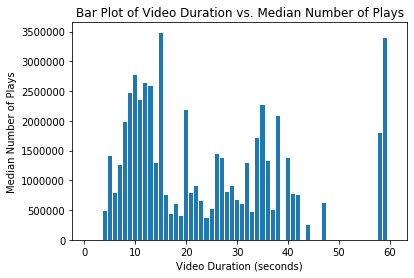

In [54]:
#Bar plot of median number of plays for each video duration (across all Hype House members)
#**NOTE** Some bars are absent because the median was only calculated if there were more than 15 videos of that length  
plt.bar(med_plays_per_len.keys(), med_plays_per_len.values())
plt.title('Bar Plot of Video Duration vs. Median Number of Plays')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Median Number of Plays')
plt.show()

In [55]:
#Sort the dictionary by value to see which video lengths get the most plays and save as dataframe
sorted_plays = {k: v for k, v in sorted(med_plays_per_len.items(), key=lambda item: item[1])}
df_ranked_plays = pd.DataFrame.from_dict(sorted_plays, orient = 'index')
df_ranked_plays.rename(columns={ df_ranked_plays.columns[0]: "Median Plays" }, inplace = True)
df_ranked_plays = df_ranked_plays.sort_values(by='Median Plays', ascending=False)
display(df_ranked_plays)

,Median Plays
15,3481978.0
59,3388976.0
10,2763283.5
12,2637211.0
13,2580300.0
9,2465305.0
11,2352203.0
35,2274944.0
20,2189885.0
38,2078635.0


### Evaluation of Significance

As is evidenced by the analysis above, on average **15 second-long videos garner the most likes and plays and 59 second-long videos amass the most shares**. Note that 59-second videos come up as a close second to 15-second videos in both likes and plays, but **59-second videos have a significantly larger number of shares than 15-sec videos** (1.62 times more median shares). The data is summarized in this table below:

|                   | 15 Sec        | 59 Sec           
|:------------------|:---------------:|:---------------:|
| Median Likes      | 582,268| 563,867 |  
| Median Shares     | 8,065  |4,996|
| Median Plays     |3,481,978  |3,388,976|    


While 15-sec and 59-sec videos are either first or second-place in terms of likes and plays, differing by a small margin, 15-sec videos are actually ranked **third** for highest median number of shares. Instead, **58-sec** videos rank second for highest median shares, second to 59-sec videos. 

Conclusively, our findings supported our hypothesis that 15-second videos out-perform 59-second videos in terms of likes and plays. However, 59-sec videos rank very closely behind 15-sec videos in both categories. Interestingly, **longer videos (58 & 59 sec videos) significantly outperformed shorter videos in terms of highest median shares.** 

## Conclusion

In this project, our objective was to analyze the success of TikTok's Hype House members in the context of their status, collaborations, and environment to make a larger statement about TikTok's viewership and TikTok fame. Using our knowledge of the app and its biggest starts, acquired via hours of quarantine-induced TikTok browsing, we drafted a list of fascinating factors to explore: the coronavirus pandemic, membership in Hype House, collaborations within Hype House, and length of TikToks. 

In response to the questions we posed in our introduction, we found that:

(1) There is a positive, linear, and statistically significant correlation between the rise of coronavirus cases in the U.S. and the TikTok success of key Hype House members Charli, Avani, and Chase. On a larger scale, this suggests that the international pandemic produced a new viewership for TikTok stars. While running regressions and validating the significance of the results with a t-test boosted our confidence in our results, we acknowledge that other factors could have contributed to the boom in TikTok success as well; we believe that the coronavirus pandemic was one of these factors. 

(2) Every member of Hype House saw a growth in popularity after joining, but some saw larger growth than others. Specifically, newer TikTokkers who joined TikTok around or after the Hype House was founded saw the largest growth in their engagement rate, while more established TikTokkers were instead able to maintain their growth. 

(3) One of the main principles behind the founding of Hype House was to make it easier for members to collaborate with eachother. We found that romantic collaborations were significantly more successful in comparison to sibling and friend pairs. This finding is interesting because it speaks to the content that TikTok's viewership values.

(4) In a short-video app which caps videos at 60 seconds, one would expect to see little variation in the success of videos within that length range. However, we found that 15-second videos are most successful in terms of likes and plays, while 59-second videos significantly outperformed all other lengths in terms of shares. It is important to note, however, that TikTok has two built-in options for video length (15 sec and 59 sec). Thus, these observations may say more about how creators use the app rather than how viewers interact with their posts. 

As was mentioned in the introduction, TikTok is unique in that its most famous members are average teenagers. Thus, the analysis we conducted can be used to make a statement about human behavior. Seeing the rise in TikTok viewership during the pandemic suggests that people turned to the app as a source of entertainment, and to see life-in-quarantine through the perspectives of their favorite TikTokkers. This could also explain why romantic relationships were found to be the most popular collaboration. Social media allows users to step out of their lives and into those of others; our project offers a perspective on this through an analysis of TikTok.  

In the future, we would like to conduct a similar analysis on another short-video social media platform such as Vine which existed before the coronavirus pandemic and had its own groups parallel to the Hype House; comparing Vine and TikTok could bring light to the questions we studied above. 

## Source Code

Github repository: https://github.com/celinakim/FinalProject-Tiktok

## Acknowledgements

Thanks to drawrowfly (who created the tiktok-scraper), cloutmeter (follower dataset, https://cloutmeter.com/), John Elflein (who published the cases for COVID on statista), Stacey Grant (article on TikTok relationsips, https://www.seventeen.com/celebrity/celebrity-couples/g31246650/hype-house-tik-tok-members/?fbclid=IwAR24MxxHlo2rWPQpW9RDCoWKxU7FfK6K9gqNuY0tQfyteAU7GuFkgHFyTU4), Anna Quintana (article on Hype House, https://www.distractify.com/p/who-lives-in-hype-house?fbclid=IwAR2PS7tEjItQh4bdJu68brJF211zfSpIGO1DMxKfTTa1wX6-RdQioTbpdko) and the members of Hype House for making our project possible.

Special thanks to Professor Mimno and all the staff of Info 2950 for teaching us the knowledge to execute the project and providing help whenever we needed! 